Data Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

compact_result_season = pd.read_csv('./data/DataFiles/RegularSeasonCompactResults.csv')


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


KeyboardInterrupt: 

In [ ]:
compact_result_season.head()

In [3]:
compact_result_season.Season.describe()

count    150684.000000
mean       2002.127107
std           9.508740
min        1985.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        2017.000000
Name: Season, dtype: float64

In [4]:
#import the file with team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')
team_ids.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [5]:
#alabama = teamid 1104
bama_wins = compact_result_season.loc[compact_result_season['WTeamID'] == 1104]
bama_loss = compact_result_season.loc[compact_result_season['LTeamID'] == 1104]

In [6]:
bama_wins.shape

(628, 8)

In [7]:
bama_loss.shape

(380, 8)

Groupby command to pull up wins

In [8]:
wins_mat = compact_result_season.groupby('WTeamID').size().to_frame()
loss_mat = compact_result_season.groupby('LTeamID').size().to_frame()

In [9]:
simplee_prop = (wins_mat)/(wins_mat+loss_mat)

In [10]:
simplee_prop.columns=['Win_prop']

In [11]:
simplee_prop

,Win_prop
WTeamID,
1101,0.267327
1102,0.366246
1103,0.575822
1104,0.623016
1105,0.380252
1106,0.453107
1107,0.497248
1108,0.347486
1109,0.248521


In [12]:
simplee_prop.sort_values('Win_prop', ascending=False)

,Win_prop
WTeamID,
1242,0.811707
1181,0.807252
1246,0.768635
1112,0.764532
1314,0.754554
1393,0.737561
1211,0.728512
1462,0.710526
1272,0.694336


In [13]:
simplee_prop['TeamID'] = simplee_prop.index

In [18]:
merged_with_ids = pd.merge(simplee_prop, team_ids)

In [37]:
sorted_wins =merged_with_ids.sort_values('Win_prop', ascending=False)


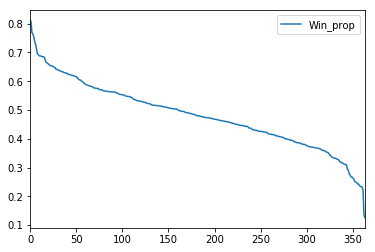

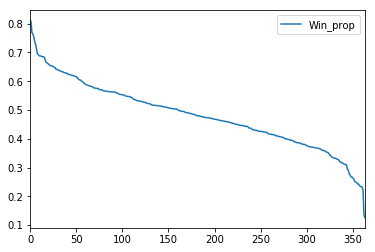

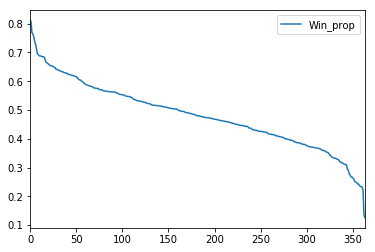

In [41]:
sorted_wins.reset_index().plot(y= 'Win_prop', use_index = True)
plt.show()